# Исследовательский анализ данных (ИАД) с помощью библиотеки Pandas

Каждый раз при получении нового набора данных Вам необходимо осуществить исследовательский анализ полученной информации. При этом Вам необходимо выполнить следующие основные задачи:

* понять, как выглядят данные
* установить, какой у них тип
* выяснить возможные проблемы, которые следует устранить
* определить, могут ли возникнуть дополнительные проблемы при моделировании данной информации в будущем.

В данном уроке у Вас не будет явной задачи по моделированию, что зачастую случается и в реальной жизни. Однако подумайте во время Вашего знакомства с данными, что бы Вы могли сделать с полученной информацией, что бы Вы могли смоделировать с их помощью, и как Ваша модель может помочь владельцу этой информации.

## Загрузка библиотек

Загрузите, пожалуйста, библиотеки необходимые для анализа данных: `numpy`, `pandas`, `matplotlib.pyplot`, и `seaborn`

In [1]:
# Импортируйте необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Операция внизу обычно не рекомендуется для использования, но она пожет нам очистить этот блокнот от предупреждающих сообщений, которые могут быть вызваны графиками в библиотеке seaborn. Можете закомментировать эти строки, если хотите увидеть предупреждения на экране.

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Загрузка данных

Загрузите файл `retail_data.csv` при помощи подходящего метода из библиотеки pandas. Используйте в качестве индекса созданного датафрэйма (data frame) колонку `"CustomerID"`. Выведите на экране первые строки фрэйма, чтобы проверить, что данные импортированы правильно.

In [3]:
# Загрузите данные
customers_wrong = pd.read_csv('data/retail_data.csv')

In [4]:
# Выведите на экран несколько строк фрэйма
customers_wrong.head()

,CustomerID,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
0,12346,United Kingdom,0.00,77183.6,38591.800000,0.0,2.0,NaN,74215.0,-74215.0,-77183.60,77183.60
1,12348,Finland,3874.60,2248.8,1291.533333,478.8,3.0,54.500000,6876.0,0.0,0.00,3874.60
2,12350,Norway,294.40,294.4,294.400000,294.4,1.0,NaN,196.0,0.0,0.00,294.40
3,12352,Norway,1845.13,1054.1,393.092000,0.0,5.0,11.333333,774.0,-63.0,-120.33,1965.46
4,12354,Spain,1079.40,1079.4,1079.400000,1079.4,1.0,NaN,530.0,0.0,0.00,1079.40


In [5]:
customers = pd.read_csv('data/retail_data.csv', index_col="CustomerID")

In [6]:
customers.head()

,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
CustomerID,,,,,,,,,,,
12346,United Kingdom,0.00,77183.6,38591.800000,0.0,2.0,NaN,74215.0,-74215.0,-77183.60,77183.60
12348,Finland,3874.60,2248.8,1291.533333,478.8,3.0,54.500000,6876.0,0.0,0.00,3874.60
12350,Norway,294.40,294.4,294.400000,294.4,1.0,NaN,196.0,0.0,0.00,294.40
12352,Norway,1845.13,1054.1,393.092000,0.0,5.0,11.333333,774.0,-63.0,-120.33,1965.46
12354,Spain,1079.40,1079.4,1079.400000,1079.4,1.0,NaN,530.0,0.0,0.00,1079.40


In [7]:
customers.iloc[0]

Country                 United Kingdom
balance                              0
max_spent                      77183.6
mean_spent                     38591.8
min_spent                            0
n_orders                             2
time_between_orders                NaN
total_items                      74215
total_items_returned            -74215
total_refunded                -77183.6
total_spent                    77183.6
Name: 12346, dtype: object

In [8]:
# Print a few rows of the DataFrame
customers.head(10)

,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
CustomerID,,,,,,,,,,,
12346,United Kingdom,0.00,77183.60,38591.800000,0.00,2.0,NaN,74215.0,-74215.0,-77183.60,77183.60
12348,Finland,3874.60,2248.80,1291.533333,478.80,3.0,54.500000,6876.0,0.0,0.00,3874.60
12350,Norway,294.40,294.40,294.400000,294.40,1.0,NaN,196.0,0.0,0.00,294.40
12352,Norway,1845.13,1054.10,393.092000,0.00,5.0,11.333333,774.0,-63.0,-120.33,1965.46
12354,Spain,1079.40,1079.40,1079.400000,1079.40,1.0,NaN,530.0,0.0,0.00,1079.40
12356,Portugal,6621.63,5011.34,3310.815000,1610.29,2.0,80.000000,4455.0,0.0,0.00,6621.63
12358,Austria,404.86,404.86,404.860000,404.86,1.0,NaN,98.0,0.0,0.00,404.86
12360,Austria,4359.34,2984.60,2179.670000,1374.74,2.0,88.000000,2116.0,0.0,0.00,4359.34
12361,Belgium,174.90,174.90,174.900000,174.90,1.0,NaN,90.0,0.0,0.00,174.90


## Понимание данных

Первым делом после того, как Вы убедились, что данные были импортированы верно, Вам следует сделать обзор полученной информации.  Для этого Вам необходимо:
1. Определить форму загруженных данных
1. Вывести на экран базовую статистику касательно распределения каждого аттрибута, например, среднее значение, стандартное отклонение, количество уникальных значений и т.д. (подсказка: для этого существуют уже готовые методы в классе DataFrame)
1. Определить типы всех данных. Понять, выглядят ли они правильно? (ответ: они не совсем верны, подумайте почему. Однако Вам необязательно исправлять их типы для следующих задач)
1. Проверить недостающие значения — можно и стоит ли их отфильтровать? Как это может повлиять в дальнейшем на процесс моделирования?

In [9]:
customers = customers.reset_index()

In [10]:
customers.head()

,CustomerID,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
0,12346,United Kingdom,0.00,77183.6,38591.800000,0.0,2.0,NaN,74215.0,-74215.0,-77183.60,77183.60
1,12348,Finland,3874.60,2248.8,1291.533333,478.8,3.0,54.500000,6876.0,0.0,0.00,3874.60
2,12350,Norway,294.40,294.4,294.400000,294.4,1.0,NaN,196.0,0.0,0.00,294.40
3,12352,Norway,1845.13,1054.1,393.092000,0.0,5.0,11.333333,774.0,-63.0,-120.33,1965.46
4,12354,Spain,1079.40,1079.4,1079.400000,1079.4,1.0,NaN,530.0,0.0,0.00,1079.40


In [11]:
# форма
customers.shape

(3254, 12)

In [12]:
?customers.describe

In [13]:
customers.describe()

,CustomerID,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
count,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,1886.000000,3254.000000,3254.000000,3254.000000,3254.000000
mean,15331.364167,3595.679152,1241.132434,697.714203,336.855298,4.025814,57.565366,2163.921942,-41.103872,-59.520221,3655.199373
std,1705.821179,12287.159793,2765.253795,1105.379255,592.529725,6.330090,45.195702,6964.880540,1323.201566,1418.811921,12427.666932
min,12346.000000,-1192.200000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-74215.000000,-77183.600000,0.000000
25%,13867.500000,330.807500,298.307500,215.720000,0.000000,1.000000,27.000000,175.000000,-3.000000,-12.400000,336.337500
50%,15302.000000,948.595000,658.430000,463.260000,150.000000,2.000000,45.250000,533.000000,0.000000,0.000000,961.725000
75%,16804.750000,3198.430000,1358.170000,852.338786,418.197500,4.000000,76.666667,1885.500000,0.000000,0.000000,3217.837500
max,18287.000000,394689.180000,77183.600000,38591.800000,9885.320000,134.000000,253.000000,148977.000000,0.000000,0.000000,394689.180000


In [14]:
# статистика
customers.describe(include='all')

,CustomerID,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
count,3254.000000,3254,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,1886.000000,3254.000000,3254.000000,3254.000000,3254.000000
unique,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15331.364167,NaN,3595.679152,1241.132434,697.714203,336.855298,4.025814,57.565366,2163.921942,-41.103872,-59.520221,3655.199373
std,1705.821179,NaN,12287.159793,2765.253795,1105.379255,592.529725,6.330090,45.195702,6964.880540,1323.201566,1418.811921,12427.666932
min,12346.000000,NaN,-1192.200000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-74215.000000,-77183.600000,0.000000
25%,13867.500000,NaN,330.807500,298.307500,215.720000,0.000000,1.000000,27.000000,175.000000,-3.000000,-12.400000,336.337500
50%,15302.000000,NaN,948.595000,658.430000,463.260000,150.000000,2.000000,45.250000,533.000000,0.000000,0.000000,961.725000
75%,16804.750000,NaN,3198.430000,1358.170000,852.338786,418.197500,4.000000,76.666667,1885.500000,0.000000,0.000000,3217.837500


In [15]:
# тип загруженных данных
customers.dtypes

CustomerID                int64
Country                  object
balance                 float64
max_spent               float64
mean_spent              float64
min_spent               float64
n_orders                float64
time_between_orders     float64
total_items             float64
total_items_returned    float64
total_refunded          float64
total_spent             float64
dtype: object

Есть ли строки с отсутствующими данными? Выведите их на экран, если такие есть (подсказка: используйте методы `isnull()` и `any()`, чтобы найти все строки с одним или несколькими недостающими значениями).

In [16]:
customers.isnull()

,CustomerID,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
0,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3249,False,False,False,False,False,False,False,True,False,False,False,False
3250,False,False,False,False,False,False,False,True,False,False,False,False
3251,False,False,False,False,False,False,False,True,False,False,False,False
3252,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
customers.any()

CustomerID              True
Country                 True
balance                 True
max_spent               True
mean_spent              True
min_spent               True
n_orders                True
time_between_orders     True
total_items             True
total_items_returned    True
total_refunded          True
total_spent             True
dtype: bool

In [18]:
customers.isnull().any(axis=1).head(10)

0     True
1    False
2     True
3    False
4     True
5    False
6     True
7    False
8     True
9    False
dtype: bool

In [19]:
# Выведите строки с недостающими данными
customers[customers.isnull().any(axis=1)].head(10)

,CustomerID,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
0,12346,United Kingdom,0.00,77183.60,38591.80,0.00,2.0,NaN,74215.0,-74215.0,-77183.60,77183.60
2,12350,Norway,294.40,294.40,294.40,294.40,1.0,NaN,196.0,0.0,0.00,294.40
4,12354,Spain,1079.40,1079.40,1079.40,1079.40,1.0,NaN,530.0,0.0,0.00,1079.40
6,12358,Austria,404.86,404.86,404.86,404.86,1.0,NaN,98.0,0.0,0.00,404.86
8,12361,Belgium,174.90,174.90,174.90,174.90,1.0,NaN,90.0,0.0,0.00,174.90
10,12364,Belgium,1840.52,1840.52,1840.52,1840.52,1.0,NaN,1656.0,0.0,0.00,1840.52
11,12373,Austria,324.60,324.60,324.60,324.60,1.0,NaN,196.0,0.0,0.00,324.60
13,12378,Switzerland,4008.62,4008.62,4008.62,4008.62,1.0,NaN,2529.0,0.0,0.00,4008.62
14,12379,Belgium,1117.63,1119.58,559.79,0.00,2.0,NaN,610.0,-1.0,-1.95,1119.58
15,12380,Belgium,1632.25,1632.25,1632.25,1632.25,1.0,NaN,798.0,0.0,0.00,1632.25


Таких, на самом деле, довольно много... но Вы увидете, что в данном случае это имеет смысл. Есть ли строки с недостающими значениями в других менее очевидных колонках? Перепишите предыдущую клетку и добавьте проверку (подсказка: используйте метод `.drop`).

In [20]:
customers.head()

,CustomerID,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
0,12346,United Kingdom,0.00,77183.6,38591.800000,0.0,2.0,NaN,74215.0,-74215.0,-77183.60,77183.60
1,12348,Finland,3874.60,2248.8,1291.533333,478.8,3.0,54.500000,6876.0,0.0,0.00,3874.60
2,12350,Norway,294.40,294.4,294.400000,294.4,1.0,NaN,196.0,0.0,0.00,294.40
3,12352,Norway,1845.13,1054.1,393.092000,0.0,5.0,11.333333,774.0,-63.0,-120.33,1965.46
4,12354,Spain,1079.40,1079.4,1079.400000,1079.4,1.0,NaN,530.0,0.0,0.00,1079.40


In [21]:
customers.drop('time_between_orders', axis=1).head()

,CustomerID,Country,balance,max_spent,mean_spent,min_spent,n_orders,total_items,total_items_returned,total_refunded,total_spent
0,12346,United Kingdom,0.00,77183.6,38591.800000,0.0,2.0,74215.0,-74215.0,-77183.60,77183.60
1,12348,Finland,3874.60,2248.8,1291.533333,478.8,3.0,6876.0,0.0,0.00,3874.60
2,12350,Norway,294.40,294.4,294.400000,294.4,1.0,196.0,0.0,0.00,294.40
3,12352,Norway,1845.13,1054.1,393.092000,0.0,5.0,774.0,-63.0,-120.33,1965.46
4,12354,Spain,1079.40,1079.4,1079.400000,1079.4,1.0,530.0,0.0,0.00,1079.40


In [22]:
assert customers.drop('time_between_orders', axis=1).isnull().any(axis=0).sum() == 0

In [23]:
# Другие колонки с недостающими данными?
customers[customers.drop('time_between_orders', axis=1).isnull().any(axis=1)]

,CustomerID,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent


В качестве бонуса напишите тест, проверяющий являются ли значения в колонке целыми или дробными числами. Пропустите это задание, если не сможете справиться с ним  быстро (оно необязательно для последующих задач).

In [24]:
customers.dtypes

CustomerID                int64
Country                  object
balance                 float64
max_spent               float64
mean_spent              float64
min_spent               float64
n_orders                float64
time_between_orders     float64
total_items             float64
total_items_returned    float64
total_refunded          float64
total_spent             float64
dtype: object

In [25]:
col_series = customers['max_spent']

In [26]:
(col_series.astype('int') == col_series).sum()

186

In [27]:
for col in customers.columns:
    print(col)

CustomerID
Country
balance
max_spent
mean_spent
min_spent
n_orders
time_between_orders
total_items
total_items_returned
total_refunded
total_spent


In [28]:
# БОНУС: пропустите это задание, если оно вызывает у Вас трудности. Найдите колонки с целочисленными значениями
for col in customers.columns:
    col_series = customers[col]
    dtype = col_series.dtype
    has_missing = col_series.isnull().any()
    if dtype == np.dtype('float64') and not has_missing:
        if (col_series.astype('int') == col_series).sum() == col_series.shape[0]:
            print('{} looks like an integer'.format(col))
            print('Converting it to an integer')
            customers[col] = customers[col].astype('int')
customers.dtypes

n_orders looks like an integer
Converting it to an integer
total_items looks like an integer
Converting it to an integer
total_items_returned looks like an integer
Converting it to an integer


CustomerID                int64
Country                  object
balance                 float64
max_spent               float64
mean_spent              float64
min_spent               float64
n_orders                  int32
time_between_orders     float64
total_items               int32
total_items_returned      int32
total_refunded          float64
total_spent             float64
dtype: object

### ========================== ВОПРОСЫ ==========================

Чтобы хорошо вполнять ИАД, Вы должны уметь быстро отвечать на простые вопросы касающиеся данных.  Со временем, когда Вы познакомитесь с библиотекой pandas поближе и изучите методы `.groupby`, `.apply`, и др., Вы сможете быстро и легко находить многие нужные Вам ответы. По [этой ссылке](https://pandas.pydata.org/pandas-docs/stable/groupby.html) Вы найдёте много полезной информации о методах pandas, которые могут пригодиться Вам в будущем.

А пока попытайтесь дать ответы на приведённые ниже вопросы касательно уже знакомых Вам данных. Эти вопросы расположены в порядке возрастающей сложности, и есть много способов найти на них ответы и, соответственно, отобразить их на экране. В моих решениях я, как правило, стараюсь представить ответы графически, если это подходит и можно легко сделать. Но Вы при желании можете также использовать таблицы или циклы for!

Если Вам понравится это задание, то попытайтесь задать себе свои собственные вопросы и ответить на них 

Используйте Ваше возможность получше почувствовать и узнать этот набор данных.

#### 1) Сколько существует уникальных клиентов? И какое среднее количество строк на клиента?

In [29]:
# Количество уникальных клиентов
nr_customers = customers['CustomerID'].nunique()
nr_customers

3254

In [30]:
nr_customers = customers.CustomerID.nunique()
nr_customers

3254

In [31]:
# Количество строк для каждого клиента
customers.shape[0] / nr_customers

1.0

#### 2) Сколько денег в целом потратили все клиенты? (отразите данную сумму в подходящем формате)

In [32]:
# общая потраченная сумма
sum_of_money = customers.total_spent.sum()
print(sum_of_money)
print(round(sum_of_money, 1))

11894018.760000002
11894018.8


#### 3) Сколько всего денег вернули клиентам?

In [33]:
customers.head()

,CustomerID,Country,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
0,12346,United Kingdom,0.00,77183.6,38591.800000,0.0,2,NaN,74215,-74215,-77183.60,77183.60
1,12348,Finland,3874.60,2248.8,1291.533333,478.8,3,54.500000,6876,0,0.00,3874.60
2,12350,Norway,294.40,294.4,294.400000,294.4,1,NaN,196,0,0.00,294.40
3,12352,Norway,1845.13,1054.1,393.092000,0.0,5,11.333333,774,-63,-120.33,1965.46
4,12354,Spain,1079.40,1079.4,1079.400000,1079.4,1,NaN,530,0,0.00,1079.40


In [34]:
# общая возвращённая сумма
tot_am_ref = -customers.total_refunded.sum()
print(tot_am_ref)

193678.8


#### 4) Предполагая, что баланс компании в начале был равен нулю, каким бы был этот баланс сейчас?

In [35]:
# нынешний баланс компании
sum_of_money - tot_am_ref

11700339.96

#### 5) Посчитайте количество покупателей из каждой страны а также число покупателей из всех стран за исключением UK.

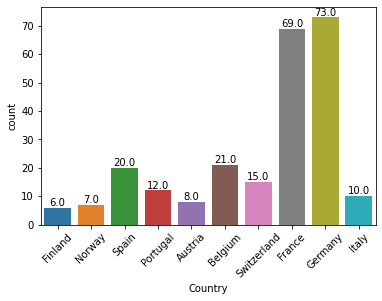

In [36]:
# Количество покупателей из каждой страны - используйте seaborn!
am = sns.countplot(customers[customers.Country!='United Kingdom'].Country)
for s in am.patches:
    x=s.get_bbox().get_points()[:,0]
    y=s.get_bbox().get_points()[1,1]
    am.annotate('{:.1f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.xticks(rotation=45)
plt.show()

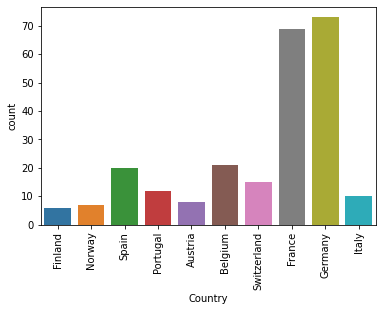

In [37]:
# ...за исключением UK
sns.countplot(customers.Country[customers.Country != 'United Kingdom'])
plt.xticks(rotation=90)
plt.show()

#### 6) Каково распределение числа заказов от покупателей? Если это распределение сложно понять или представить, то попытайтесь разбить его на интервалы.

In [38]:
np.mean(customers.n_orders<20)

0.9769514443761524

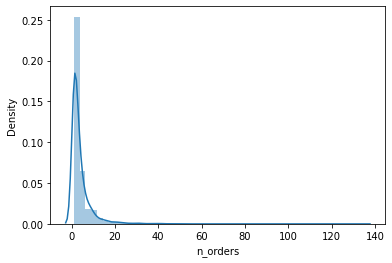

In [39]:
# Распределение числа заказов от покупателей
sns.distplot(customers.n_orders, bins=50)
#sns.distplot(customers['n_orders'], bins=50)
plt.show()

In [40]:
customers.columns

Index(['CustomerID', 'Country', 'balance', 'max_spent', 'mean_spent',
       'min_spent', 'n_orders', 'time_between_orders', 'total_items',
       'total_items_returned', 'total_refunded', 'total_spent'],
      dtype='object')

In [41]:
np.percentile(customers.balance, 50)

948.5949999999998

Text(0.5, 1.0, 'my great title')

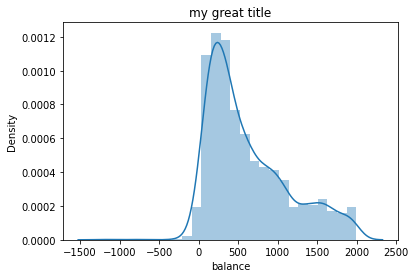

In [42]:
# Распределение большинства заказов
x = 'balance'
query = 'balance <= 2000'
df = customers.query(query)
sns.distplot(df[x], bins=26, rug=False)
plt.title('my great title')

Text(0.5, 1.0, 'my great title')

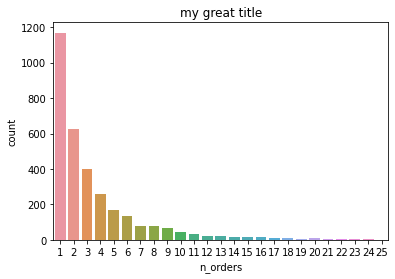

In [43]:
# Распределение большинства заказов
x = 'n_orders'
query = 'n_orders <= 25'
df = customers.query(query)
sns.countplot(df[x])
plt.title('my great title')

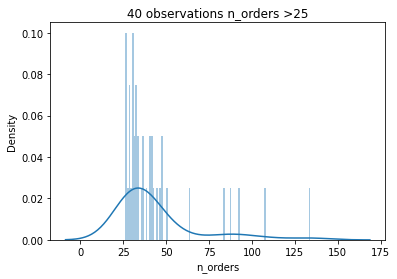

In [44]:
# Распределение статистических выбросов (outliers)
x = 'n_orders'
query = 'n_orders >25'
df = customers.query(query)
sns.distplot(df[x], rug=False, bins=np.arange(25, df[x].max().round()+1))
# sns.countplot(df[x].astype(int))
plt.title('{} observations {}'.format(df.shape[0], query))
plt.show()

#### 7) Каково распределение сумм, потраченных покупателями? Опять таки, если это распределение сложно представить,  то попытайтесь разбить его на интервалы. Обратите внимание на то, сколько наблюдений Вам необходимо для каждого графика.

<AxesSubplot:xlabel='total_spent', ylabel='Density'>

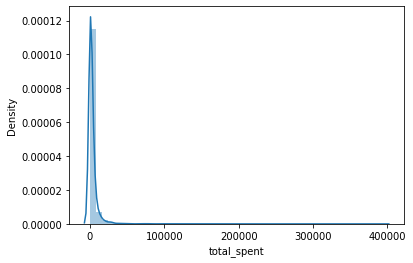

In [45]:
sns.distplot(( customers['total_spent']) )

<AxesSubplot:xlabel='total_spent', ylabel='Density'>

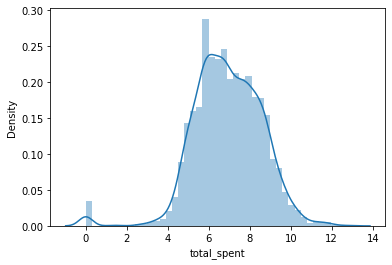

In [46]:
# Распределение общих потраченных сумм
sns.distplot(np.log(1 + customers['total_spent']))

Text(0.5, 1.0, '3231 observations <50k')

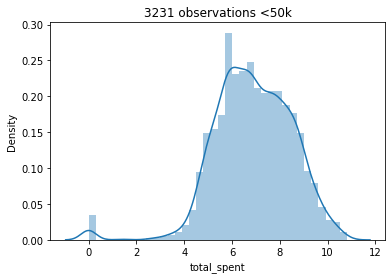

In [47]:
# ...распределение для большинства компаний
df = customers.query('total_spent < 50000')
sns.distplot( np.log(1+df['total_spent']), rug=False)
plt.title('{} observations <50k'.format(df.shape[0]))

Text(0.5, 1.0, '23 observations >=50k')

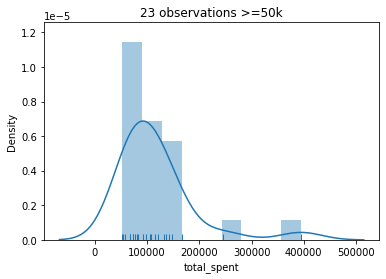

In [48]:
# ...распределение выбросов
df = customers.query('total_spent >= 50000')
sns.distplot(df['total_spent'], rug=True)
plt.title('{} observations >=50k'.format(df.shape[0]))

#### 8) А что с распределением возвращённых денег? И снова постарайтесь использовать интервалы, если Вам сложно  представить распределение графически.

<AxesSubplot:xlabel='total_refunded', ylabel='Density'>

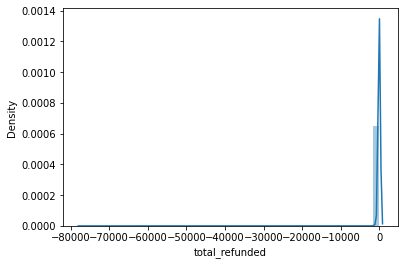

In [49]:
# Распределение возвратов
sns.distplot(customers['total_refunded'])

0.66 of customers have never had a refund
Range of the orders with a refund: (-77183.6, -0.42)


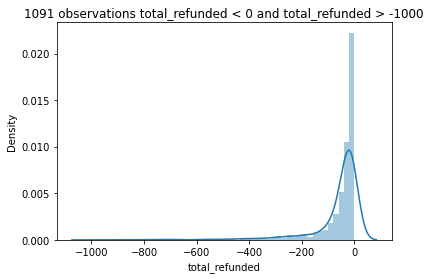

In [50]:
# ...распределение большинства
prop_refunded = sum(customers.total_refunded == 0) / customers.shape[0]
print('{:.2f} of customers have never had a refund'.format(prop_refunded))
df = customers.query('total_refunded < 0')
print('Range of the orders with a refund: ({}, {})'.format(
    df['total_refunded'].min(), df['total_refunded'].max()))
query = 'total_refunded < 0 and total_refunded > -1000'
df = customers.query(query)
sns.distplot(df['total_refunded'], rug=False)
plt.title('{} observations {}'.format(df.shape[0], query))
plt.show()

Text(0.5, 1.0, '16 observations total_refunded <= -1000')

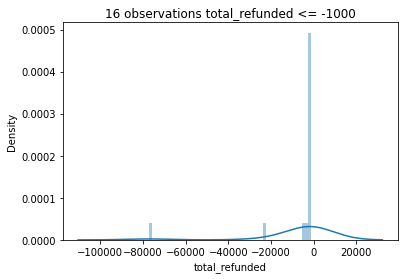

In [51]:
# ...распределение выбросов
query = 'total_refunded <= -1000'
df = customers.query(query)
sns.distplot(df['total_refunded'], rug=False)
plt.title('{} observations {}'.format(df.shape[0], query))

#### 9) Отобразите распределение общих потраченных сумм для каждой страны при помощи графиков [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html?highlight=violin#seaborn.violinplot) и/или [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html). 

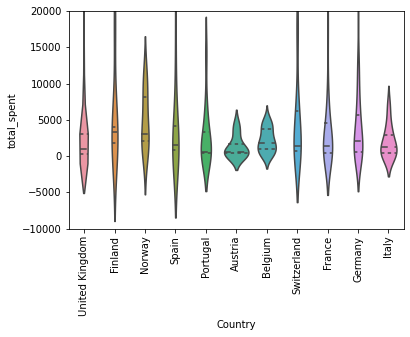

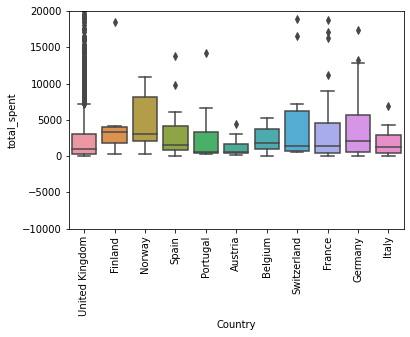

In [52]:
# Графики violin plot и box plot для общей потраченной суммы для каждой страны
plt.figure()
sns.violinplot(x="Country", y="total_spent",
               inner="quart",
               data=customers)
plt.xticks(rotation=90)
# there are large outliers which make the plot unhelpful
# I note this, and alter the scale of the y axis to get a better look
y_max = 20000
plt.ylim([-10000, y_max])
plt.show()
plt.figure()
sns.boxplot(x="Country", y="total_spent",
               data=customers)
plt.xticks(rotation=90)
plt.ylim([-10000, y_max])
plt.show()

#### 10a) Какова общая потраченая сумма для каждой страны? Одной из возможностью для подсчёта здесь является использование метода `groupby`, чтобы создать `DataFrame` с нужной информацией, и `sns.barplot`, чтобы представить полученные данные графически.

In [53]:
df_sum_tot_spent = customers['total_spent'].groupby(customers['Country']).sum().reset_index()
#df_sum_tot_spent.columns = ['Country', 'sum of total spent']
df_sum_tot_spent

,Country,total_spent
0,Austria,10619.20
1,Belgium,46252.29
2,Finland,31091.07
3,France,272068.47
4,Germany,325883.91
5,Italy,20046.71
6,Norway,34714.18
7,Portugal,33414.90
8,Spain,95774.83
9,Switzerland,67361.13


In [54]:
# Общая потраченная сумма для каждой страны
# Sum of total spent broken down by country
sum_tot_spent_by_country = (customers['total_spent'] 
         .groupby(customers['Country']) 
         .sum()
         .rename('sum of total spent') 
         .reset_index()  # required to make 'Country' a column for the plot
                           ) # I use these brackets here to allow the methods to chain over newlines - readability
sum_tot_spent_by_country

,Country,sum of total spent
0,Austria,10619.20
1,Belgium,46252.29
2,Finland,31091.07
3,France,272068.47
4,Germany,325883.91
5,Italy,20046.71
6,Norway,34714.18
7,Portugal,33414.90
8,Spain,95774.83
9,Switzerland,67361.13


In [55]:
# Sum of total spent broken down by country
sum_tot_spent_by_country = customers['total_spent'] \
         .groupby(customers['Country']) \
         .sum() \
         .rename('sum of total spent') \
         .reset_index()  # required to make 'Country' a column for the plot
 # I use these brackets here to allow the methods to chain over newlines - readability
sum_tot_spent_by_country

,Country,sum of total spent
0,Austria,10619.20
1,Belgium,46252.29
2,Finland,31091.07
3,France,272068.47
4,Germany,325883.91
5,Italy,20046.71
6,Norway,34714.18
7,Portugal,33414.90
8,Spain,95774.83
9,Switzerland,67361.13


In [56]:
#?sns.barplot

In [57]:
sns.barplot(x='Country', y='total_spent', data=customers, estimator=np.sum , n_boot=0)
plt.xticks(rotation=90)
plt.show()

IndexError: cannot do a non-empty take from an empty axes.

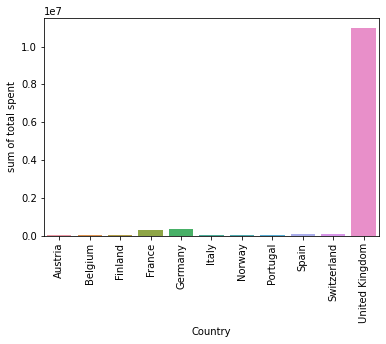

In [58]:
# Отобразите данные графически
sns.barplot(x='Country', y='sum of total spent', data=sum_tot_spent_by_country)
plt.xticks(rotation=90)
plt.show()

#### 10b) Как и ожидалось, здесь снова преобладает одна страна. Попробуйте снова представить данные графически, но исключите преобладающую страну. Запишите в названии графика, какая часть общей потраченной суммы представлена на картинке.

NameError: name 'sum_tot_spent' is not defined

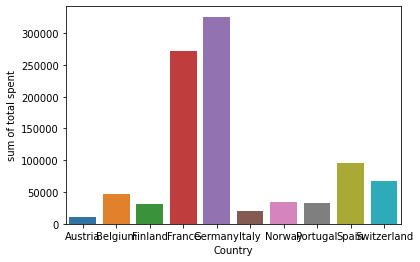

In [117]:
# Изобразите графически общую потраченную сумму для каждой страны за исключением UK
df = sum_tot_spent_by_country.query('Country != "United Kingdom"')
sns.barplot(x='Country', y='sum of total spent', data=df)
prop_uk_spending = customers.query('Country == "United Kingdom"')['total_spent'].sum() / sum_tot_spent
plt.title('{:.3f} of total spent is not from UK'.format(1 - prop_uk_spending))
plt.xticks(rotation=90)
plt.show()

#### 10c) Какова средняя потраченная сумма в каждой стране? (Подсказка: Вы можете использовать код очень похожий на тот, который Вы применяли, чтобы посчитать общую потраченную сумму)

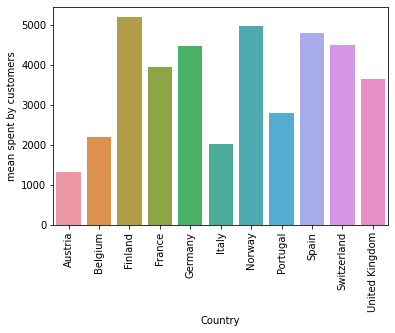

,Country,mean spent by customers
0,Austria,1327.400000
1,Belgium,2202.490000
2,Finland,5181.845000
3,France,3943.021304
4,Germany,4464.163151
5,Italy,2004.671000
6,Norway,4959.168571
7,Portugal,2784.575000
8,Spain,4788.741500
9,Switzerland,4490.742000


In [118]:
# Средняя total_spent для каждой страны
avg_spend_by_country = (
    customers['total_spent']
         .groupby(customers['Country'])
         .mean()
         .rename('mean spent by customers')
         .reset_index()  # required to make 'Country' a column for the plot
)
sns.barplot(x='Country', y='mean spent by customers', data=avg_spend_by_country)
plt.xticks(rotation=90)
plt.show()
avg_spend_by_country

#### 10d) Бонус: (переходите к следующему заданию, если не сможете справиться за пару минут) -- Какова средняя сумма *заказа* в каждой стране (используйте колонку `n_orders`)? Подсказка: будьте внимательны...среднее значение колонки `mean_spent` не равно искомой величине, например, $\frac{\frac{10}{5} + \frac{20}{4}}{2} \ne \frac{10 + 20}{5+4}$...В моём решении я сначала использую функцию, чтобы посчитать среднюю сумму заказа для данного датафрэйма, а затем применяю данную функцию с помощью метода `apply` к каждой стране, предварительно сгруппировав их, используя  метод `groupby`.

Mean spent per order in the dataset = £907.94
           Country  mean spend per order
0          Austria            816.861538
1          Belgium            700.792273
2          Finland           1413.230455
3           France           1075.369447
4          Germany            941.861012
5            Italy            742.470741
6           Norway           2479.584286
7         Portugal           1077.900000
8            Spain           1680.260175
9      Switzerland           1820.571081
10  United Kingdom            895.601771


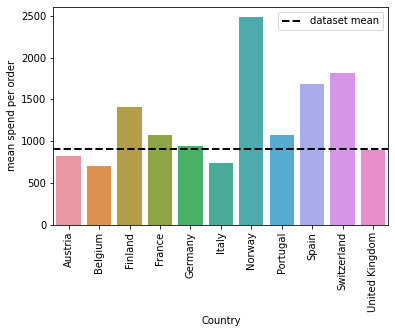

Mean spent per item in the dataset = £1.69
           Country  mean spend per item
0          Austria             1.821475
1          Belgium             1.448734
2          Finland             1.481656
3           France             1.625201
4          Germany             1.750624
5            Italy             1.862039
6           Norway             1.696768
7         Portugal             1.708416
8            Spain             2.126156
9      Switzerland             1.615917
10  United Kingdom             1.687845


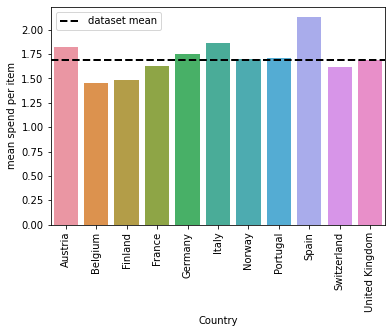

In [119]:
# Средняя сумма заказа для каждой страны
def mean_spent_per_order(df):
    total_orders = df.n_orders.sum()
    total_spent = df.total_spent.sum()
    return total_spent/total_orders
print('Mean spent per order in the dataset = £{:.2f}'.format(mean_spent_per_order(customers)))

avg_order_spend_by_country = (
    customers
         .groupby(customers['Country'])
         .apply(mean_spent_per_order)
         .rename('mean spend per order')
         .reset_index()  # required to make 'Country' a column for the plot
) # I use these brackets here to allow the methods to chain over newlines - readability
print(avg_order_spend_by_country)

sns.barplot(x='Country', y='mean spend per order', data=avg_order_spend_by_country)
plt.axhline(mean_spent_per_order(customers), color='black', linestyle='dashed', linewidth=2, label='dataset mean')
plt.legend()
plt.xticks(rotation=90)
plt.show()


# EXTRA ==============
# A little bonus for your efforts - see how easy it is to change this analysis to "mean spent per *item*"
def mean_spent_per_item(df):
    total_items = df.total_items.sum()
    total_spent = df.total_spent.sum()
    return total_spent/total_items
print('Mean spent per item in the dataset = £{:.2f}'.format(mean_spent_per_item(customers)))

avg_item_spend_by_country = (
    customers
         .groupby(customers['Country'])
         .apply(mean_spent_per_item)
         .rename('mean spend per item')
         .reset_index()  # required to make 'Country' a column for the plot
) # I use these brackets here to allow the methods to chain over newlines - readability
print(avg_item_spend_by_country)
sns.barplot(x='Country', y='mean spend per item', data=avg_item_spend_by_country)
plt.axhline(mean_spent_per_item(customers), color='black', linestyle='dashed', linewidth=2, label='dataset mean')
plt.legend()
plt.xticks(rotation=90)
plt.show()


#### 11a) Поскольку при сравнении стран общее число заказов очень сдвинуто, нам следует сравнить их соотношения. Сравните  **пропорции** количества клиентов с 1 заказом по сравнению с клиентами, сделавшими 2+ заказа, для каждой страны. Выведите данную информацию в виде таблицы или графика.

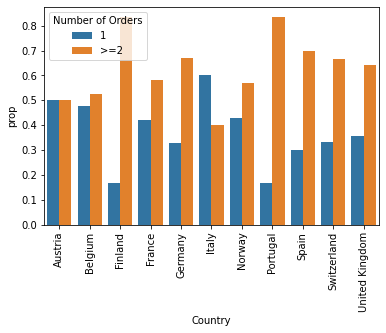

In [120]:
df = customers

x, y, hue = "Country", "prop", "Number of Orders"

one_or_more = lambda x: '1' if x==1 else '>=2'

prop_df = (df['n_orders']
           .apply(one_or_more)
           .rename(hue)
           .groupby(df[x])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
plt.xticks(rotation=90)
plt.show()

#### 11b) Повторите предыдущее задание, используя функцию `pd.cut` и более интересные группы интервалов.

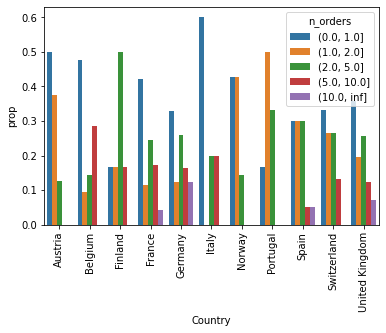

In [121]:
df = customers
x, y, hue = "n_orders", "prop", "Country"

prop_df = (pd.cut(df[x], [0, 1, 2, 5, 10, np.inf])
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=hue, y=y, hue=x, data=prop_df)
plt.xticks(rotation=90)
plt.show()

#### 12) Попытайтесь своими словами обобщить всё то, что Вы узнали об этом наборе данных из Вашего анализа

In [ ]:
# Обобщите Ваши новые знания из приведённых выше заданий!
